In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
"""
For this analysis, i'll be using a Reddit API wrapper,
called "praw", to loop through the /r/politics subreddit headlines.
"""
import praw

In [3]:
reddit = praw.Reddit(client_id='---------------',
                     client_secret='----------------------------',
                     user_agent='theone9807')

In [4]:
headlines = set()

In [6]:
#Now, we can iterate through the /r/politics subreddit using the API client:
for submission in reddit.subreddit('politics').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

933


In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA



In [16]:
sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:5], width=100)

[{'compound': -0.7579,
  'headline': 'Rep. Matt Getz calls for Parkland Fathers to be Removed from House Hearing on Gun '
              'Violence',
  'neg': 0.317,
  'neu': 0.683,
  'pos': 0.0},
 {'compound': -0.2732,
  'headline': 'Gaetz Tries To Get Father Of Parkland Victim Removed From Background Check Hearing',
  'neg': 0.149,
  'neu': 0.851,
  'pos': 0.0},
 {'compound': -0.4939,
  'headline': 'Guns v grief: inside America’s deadliest cultural chasm',
  'neg': 0.348,
  'neu': 0.652,
  'pos': 0.0},
 {'compound': 0.5994,
  'headline': 'Virginia AG Mark Herring admits wearing blackface at 1980 college party',
  'neg': 0.0,
  'neu': 0.647,
  'pos': 0.353},
 {'compound': 0.0,
  'headline': "State of the Union guest: How Nashville's Matthew Charles benefited from First Step "
              'Act',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [17]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,headline,neg,neu,pos
0,-0.7579,Rep. Matt Getz calls for Parkland Fathers to b...,0.317,0.683,0.000
1,-0.2732,Gaetz Tries To Get Father Of Parkland Victim R...,0.149,0.851,0.000
2,-0.4939,Guns v grief: inside America’s deadliest cultu...,0.348,0.652,0.000
3,0.5994,Virginia AG Mark Herring admits wearing blackf...,0.000,0.647,0.353
4,0.0000,State of the Union guest: How Nashville's Matt...,0.000,1.000,0.000


In [18]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,compound,headline,neg,neu,pos,label
0,-0.7579,Rep. Matt Getz calls for Parkland Fathers to b...,0.317,0.683,0.000,-1
1,-0.2732,Gaetz Tries To Get Father Of Parkland Victim R...,0.149,0.851,0.000,-1
2,-0.4939,Guns v grief: inside America’s deadliest cultu...,0.348,0.652,0.000,-1
3,0.5994,Virginia AG Mark Herring admits wearing blackf...,0.000,0.647,0.353,1
4,0.0000,State of the Union guest: How Nashville's Matt...,0.000,1.000,0.000,0


In [19]:
#We have all the data we need to save, so let's do that:
df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [20]:
"""
Dataset Info and Statistics
Let's first take a peak at a few positive and negative headlines:
"""
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Virginia AG Mark Herring admits wearing blackface at 1980 college party',
 'Collins boasts best fundraising quarter after Kavanaugh vote',
 'Analysis | President Trump’s fantastical human-trafficking claims',
 'Most Californians like Gov. Gavin Newsom’s $209 billion budget proposal, survey says',
 'Trump: People of faith led ‘abolition of civil rights’']

Negative headlines:

['Rep. Matt Getz calls for Parkland Fathers to be Removed from House Hearing on Gun Violence',
 'Gaetz Tries To Get Father Of Parkland Victim Removed From Background Check Hearing',
 'Guns v grief: inside America’s deadliest cultural chasm',
 'WTF Is Going On In Virginia Politics These Days? | Blackface, a sexual assault allegation, more blackface. Please stop, Virginia.',
 'Woman describes alleged sexual assault by Virginia Lt. Gov. Justin Fairfax']


In [21]:
#Now let's check how many total positives and negatives we have in this dataset:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)
#The first line gives us raw value counts of the labels, 
#whereas the second line provides percentages with the normalize keyword.

 0    448
-1    276
 1    209
Name: label, dtype: int64
 0    48.017149
-1    29.581994
 1    22.400857
Name: label, dtype: float64


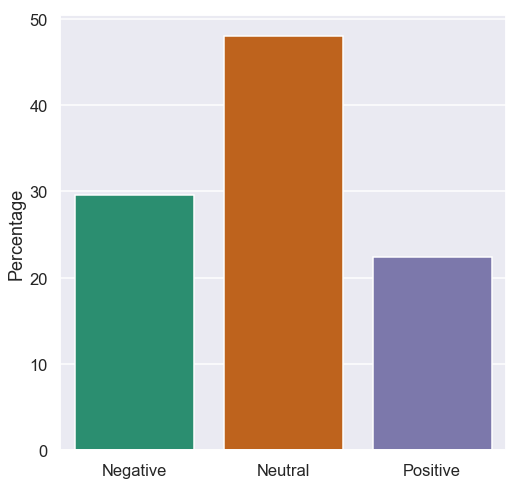

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")


plt.show()

In [23]:
"""
Tokenization is the process of breaking a stream of text up into meaningful elements called tokens.
You can tokenize a paragraph into sentences, a sentence into words and so on.
"""

from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))


['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [24]:
#use another tokenizer that only looks at words, not punctuation
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [25]:
#We can grab a simple list of stopwords from NLTK:

from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [26]:
#Let's start by creating a function that will read a list of headlines and perform lowercasing, tokenizing, and stopword removal:

def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [27]:
"""We can grab all of the positive label headlines from our dataframe,
hand them over to our function, then call NLTK's `FreqDist` function to get 
the most common words in the positive headlines:
"""
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('trump', 72),
 ('says', 23),
 ('party', 22),
 ('new', 22),
 ('virginia', 19),
 ('blackface', 17),
 ('state', 17),
 ('deal', 16),
 ('union', 15),
 ('house', 14),
 ('college', 12),
 ('president', 12),
 ('tax', 12),
 ('green', 12),
 ('attorney', 12),
 ('wore', 11),
 ('herring', 10),
 ('democrats', 10),
 ('general', 10),
 ('u', 9)]

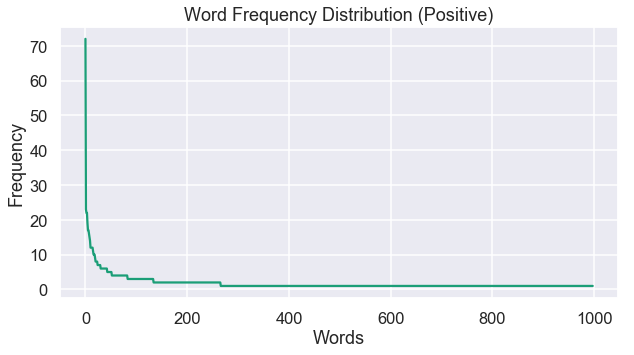

In [28]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

The above chart is showing the frequency patterns, where the y-axis is the frequency of the words and in x-axis is the words ranked by their frequency. So, the most frequent word, which in our case is ‘trump’, is plotted at (1,74).